In [7]:
# =======================
# Step 1 — Upload kaggle.json
# =======================
from google.colab import files
files.upload()  # Upload your kaggle.json file here

# =======================
# Step 2 — Setup Kaggle API
# =======================
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install kaggle

# =======================
# Step 3 — Download & Unzip Dataset
# =======================
!kaggle datasets download -d tongpython/cat-and-dog
!unzip -o cat-and-dog.zip -d cats_dogs_dataset  # -o means overwrite without asking

# =======================
# Step 4 — Train SVM Model
# =======================
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm

IMG_SIZE = 64
data = []
labels = []

# Correct path based on actual dataset structure
dataset_path = 'cats_dogs_dataset/training_set/training_set'
categories = ['cats', 'dogs']

# Load and preprocess images
for label, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    for img_name in tqdm(os.listdir(folder_path), desc=f"Loading {category}"):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img.flatten())
            labels.append(label)

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

print(f"Total samples: {len(data)}, Classes: {len(set(labels))}")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Train SVM
print("Training SVM model...")
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=categories))


Streaming output truncated to the last 5000 lines.
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.3704.jpg  
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.3705.jpg  
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.3706.jpg  
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.3707.jpg  
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.3708.jpg  
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.3709.jpg  
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.371.jpg  
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.3710.jpg  
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.3711.jpg  
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.3712.jpg  
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.3713.jpg  
  inflating: cats_dogs_dataset/training_set/training_set/cats/cat.3714.jpg  
  inflating: cats_dogs_dat

Loading dogs: 100%|██████████| 4006/4006 [00:02<00:00, 1768.96it/s]


Total samples: 8005, Classes: 2
Training SVM model...

Accuracy: 0.5171767645221736

Classification Report:
               precision    recall  f1-score   support

        cats       0.53      0.53      0.53       819
        dogs       0.51      0.50      0.50       782

    accuracy                           0.52      1601
   macro avg       0.52      0.52      0.52      1601
weighted avg       0.52      0.52      0.52      1601



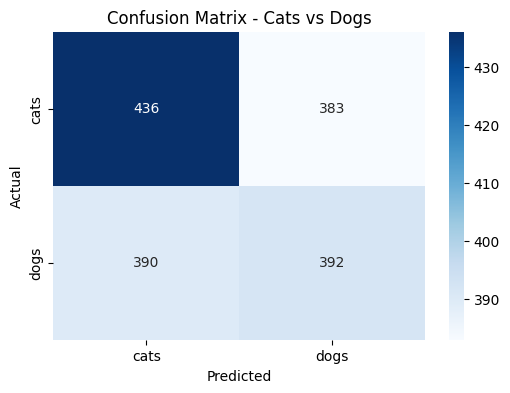

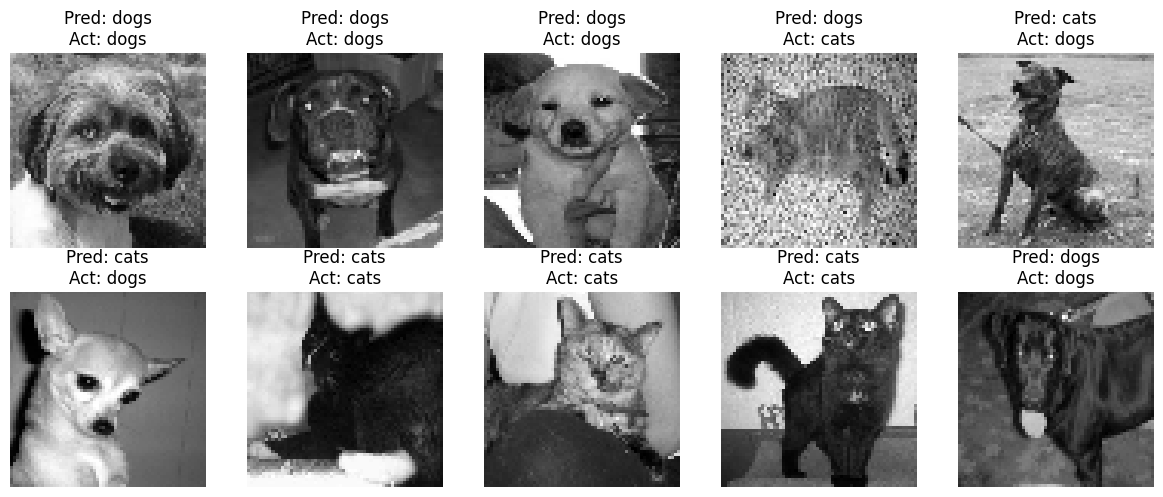

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=categories, yticklabels=categories)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Cats vs Dogs")
plt.show()

# Show some sample predictions
fig, axes = plt.subplots(2, 5, figsize=(12,5))
for i, ax in enumerate(axes.flat):
    img = X_test[i].reshape(IMG_SIZE, IMG_SIZE)
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Pred: {categories[y_pred[i]]}\nAct: {categories[y_test[i]]}")
    ax.axis('off')
plt.tight_layout()
plt.show()